<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Gradient Descent Code-Along

Let's walk through how gradient descent works using code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The objective function
def f(x):
    return -np.log(x) / (1 + x)

In [3]:
# Derivative of the objective function
def f_deriv(x):
    return -(1 / x + 1 - np.log(x)) / (1 + x)**2

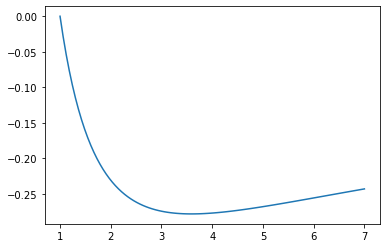

In [5]:
# Let's see what it looks like
xs = np.linspace(1, 7, 100)
plt.plot(xs, f(xs));

In [11]:
# Compute Gradient Descent by hand --> by Python :)

# Initial value and learning rate


# Iterate and apply gradient descent

for i in range(300):
    x =  # This is gradient descent
    
    print(f'Step{i}: x = {x}')

Step0: x = 1.5
Step1: x = 1.7017922493693605
Step2: x = 1.8464470335715468
Step3: x = 1.9610221405517203
Step4: x = 2.0564265087916813
Step5: x = 2.1383502647523693
Step6: x = 2.210194938504022
Step7: x = 2.2741780114298074
Step8: x = 2.331835353759208
Step9: x = 2.3842796768132155
Step10: x = 2.4323456906041288
Step11: x = 2.4766772253818217
Step12: x = 2.5177823181051524
Step13: x = 2.5560695414655683
Step14: x = 2.5918728109273808
Step15: x = 2.625468827233227
Step16: x = 2.657089651028602
Step17: x = 2.686931966038015
Step18: x = 2.7151640327562623
Step19: x = 2.7419309959321643
Step20: x = 2.7673589958070934
Step21: x = 2.791558395049376
Step22: x = 2.8146263418622817
Step23: x = 2.836648827825167
Step24: x = 2.85770235629841
Step25: x = 2.877855307220008
Step26: x = 2.897169062720038
Step27: x = 2.9156989424915425
Step28: x = 2.9334949864996505
Step29: x = 2.9506026141813595
Step30: x = 2.967063182961276
Step31: x = 2.982914464109841
Step32: x = 2.998191050295703
Step33: x = 3.01

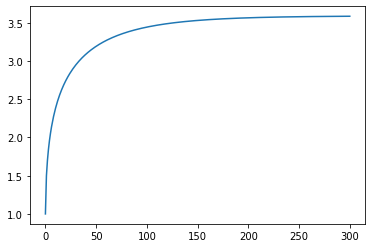

In [13]:
# Plot iterations
plt.plot(x_steps);

## Let's see if we can do OLS by Gradient Descent!

In [14]:
# Set a random seed.
np.random.seed(42)

In [15]:
# Randomly generate data from a Poisson(45) distribution.
temp = np.random.poisson(45, 100)

In [16]:
# View array.
temp

array([42, 50, 37, 47, 52, 38, 41, 44, 47, 41, 44, 38, 47, 47, 41, 49, 36,
       40, 41, 46, 58, 47, 34, 29, 43, 52, 40, 37, 51, 49, 51, 42, 53, 42,
       41, 50, 55, 36, 50, 51, 45, 41, 56, 43, 39, 41, 57, 48, 52, 55, 41,
       39, 43, 36, 59, 45, 63, 45, 40, 47, 30, 56, 37, 48, 39, 42, 48, 34,
       41, 49, 45, 48, 49, 58, 42, 40, 52, 46, 55, 42, 48, 47, 35, 46, 48,
       49, 41, 48, 48, 34, 40, 55, 51, 46, 38, 40, 48, 56, 44, 41])

In [17]:
# Calculate mean of array.
print(np.mean(temp))

45.18


**Ohio State Fun Facts:**
1. Ohio Stadium can seat 104,944 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
2. Ohio Stadium's record attendance is 110,045 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
3. Ohio State is better than Michigan. (Source: It's just a fact.)
4. Ohio State students enjoy soda. (Source: first-hand knowledge.)

In [18]:
# sodas ~ N(200000 + 1000 * temp, 20000)
sodas_sold = 200_000 + 1000 * temp + np.round(np.random.normal(0, 20_000, 100))

In [19]:
sodas_sold

array([233070., 267128., 241282., 222085., 255464., 245706., 223323.,
       247075., 248164., 218141., 251156., 249216., 268661., 268076.,
       213447., 230243., 246301., 250276., 251301., 323055., 269418.,
       269711., 253080., 242028., 236695., 267179., 224543., 232264.,
       241293., 250637., 297293., 204655., 266725., 209746., 231561.,
       271779., 256286., 214445., 235694., 264592., 230393., 245329.,
       256911., 229968., 281879., 253678., 216497., 251729., 238764.,
       272049., 225150., 236705., 253100., 253315., 234994., 238310.,
       253501., 231933., 275309., 255100., 204782., 274357., 279443.,
       268649., 208613., 232315., 273338., 219847., 249876., 264493.,
       226461., 246809., 184175., 237512., 236949., 215044., 284648.,
       217397., 246199., 244615., 276825., 218283., 258263., 246205.,
       228370., 258242., 244981., 235996., 249396., 226294., 242270.,
       268243., 282720., 221244., 280661., 200958., 244964., 267766.,
       249620., 2285

$$ \text{sodas_sold}_i = 200000 + 1000 * \text{temp}_i + \varepsilon_i $$

In [20]:
# Create dataframe with temp and sodas_sold.


In [21]:
# Check the first five rows.


,temp,drinks
0,42,233070.0
1,50,267128.0
2,37,241282.0
3,47,222085.0
4,52,255464.0


#### Our goal is to fit a model here.
- You and I know that our $y$-intercept $\beta_0$ is 200,000.
- You and I know that our slope $\beta_1$ is 1,000.
- However, our computer does not know that. Our computer has to estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ from the data.
    - We might say that our **machine** has to... **learn**.

#### Our workflow:
1. Instantiate model.
2. Select a learning rate $\alpha$.
3. Select a starting point $\hat{\beta}_{1,0}$.
4. Calculate the gradient of the loss function.
5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.
6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.
7. Repeat steps 4 through 6 until "stopping condition" is met.

#### Step 1. Instantiate model.

Our model takes on the form:
$$ Y = \beta_0 + \beta_1 X + \varepsilon$$

#### Step 2. Select a learning rate $\alpha$.

$$\alpha = 0.1$$

#### Step 3. Select a starting point.
The zero-th iteration of $\hat{\beta}_1$ is going to start at, say, 20.
$$\hat{\beta}_{1,0} = 20$$

Two points:
- You and I know that the true value of $\beta_1$ is 1000. We need the computer to figure (machine to learn) that part out!
- We're going to pretend like the computer already knows the value for $\beta_0$. In reality, we'd have to do this for $\beta_0$ and for $\beta_1$ at the same time.

In [23]:
# This actually matters least

#### Step 4. Calculate the gradient of the loss function with respect to parameter $\beta_1$.

The loss function, $L$, is our mean square error.

$$L = \frac{1}{n}\sum_{i = 1} ^ n (y_i - \hat{y}_i)^2 $$

$$\Rightarrow L = \frac{1}{n}\sum_{i = 1} ^ n \left(y_i - \left(\hat{\beta}_0 + \hat{\beta}_1x_i\right)\right)^2 $$

The gradient of this loss function with respect to $\beta_1$ is:

$$\frac{\partial L}{\partial \beta_1} = \frac{2}{n} \sum_{i=1}^n -x_i\left(y_i - \left(\hat{\beta}_1x_i + \hat{\beta}_0\right)\right) $$

In [24]:
# Calculate gradient of beta_1.


#### Step 5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.

In [25]:
# Define function to calculate new value of beta_1.
# This is my updated Beta_1 value

#### Step 6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.

#### Step 7: Save final value of $\hat{\beta}_1$.

#### Putting it all together...

In [41]:
def gradient_descent(x, y, beta_1 = 0, alpha = 0.01, max_iter = 100):
    # Set converged = False.
    converged = False
    
    # Iterate through our observations.
    step = 0
    while not converged:
        
        # Calculate gradient.
        gradient = beta_1_gradient(x, y, beta_1=beta_1, beta_0=200_000)
        
        # Update beta_1.
        beta_1_new = update_beta_1(beta_1, alpha, gradient)
        
        # Check for convergence.
        converged = check_update(beta_1, beta_1_new)
        
        # Overwrite beta_1.
        beta_1 = beta_1_new
        
        # Print out current step findings.
        print(f'Step: {step}: b1 = {beta_1}')
        
        # If we've converged, let us know!
        if converged:
            print(f'We have finished Gradient Descent; our function has converged at step{step} 😄👌✌️!')
        else:
            step += 1
            
        # If we exceed our step limit, break!
        if step > max_iter:
            break
        
    # If we didn't converge by the end of our loop, let us know!
    if not converged:
        print('WE DID NOT CONVERGE 😒😒😒😭😭!!')
    
    # Return beta_1.
    return beta_1

In [43]:
# Call gradient_descent with an initial beta_1 of 20, alpha of 0.01, and 100 iterations.
gradient_descent(df['temp'], df['drinks'], beta_1=10, alpha=0.1, max_iter=50)

Step: 0: b1 = 418337.08400000003
Step: 1: b1 = -173677682.11844802
Step: 2: b1 = 72280210821.4027
Step: 3: b1 = -30080999475465.992
Step: 4: b1 = 1.2518869714126134e+16
Step: 5: b1 = -5.210003046666881e+18
Step: 6: b1 = 2.1682573879374483e+21
Step: 7: b1 = -9.02368013652704e+23
Step: 8: b1 = 3.755403009778731e+26
Step: 9: b1 = -1.5628935813856334e+29
Step: 10: b1 = 6.504325475524219e+31
Step: 11: b1 = -2.7069181417998656e+34
Step: 12: b1 = 1.126543536909133e+37
Step: 13: b1 = -4.688358768425477e+39
Step: 14: b1 = 1.9511636453731667e+42
Step: 15: b1 = -8.120196766222417e+44
Step: 16: b1 = 3.3793985285923166e+47
Step: 17: b1 = -1.4064110444413218e+50
Step: 18: b1 = 5.853088971872336e+52
Step: 19: b1 = -2.4358917436020533e+55
Step: 20: b1 = 1.0137499387183533e+58
Step: 21: b1 = -4.218943394962947e+60
Step: 22: b1 = 1.7558061105685205e+63
Step: 23: b1 = -7.307173406475224e+65
Step: 24: b1 = 3.041040970919606e+68
Step: 25: b1 = -1.2655961029495547e+71
Step: 26: b1 = 5.267056613567219e+73
St

3.8381024963777166e+136

<details><summary>What should we do?</summary>

- We **should not** adjust our maximum iterations. It doesn't look like we'll converge.
- We should adjust our alpha!
</details>